MetaTrader5 package version: 5.0.45
MetaTrader5 author: MetaQuotes Ltd.


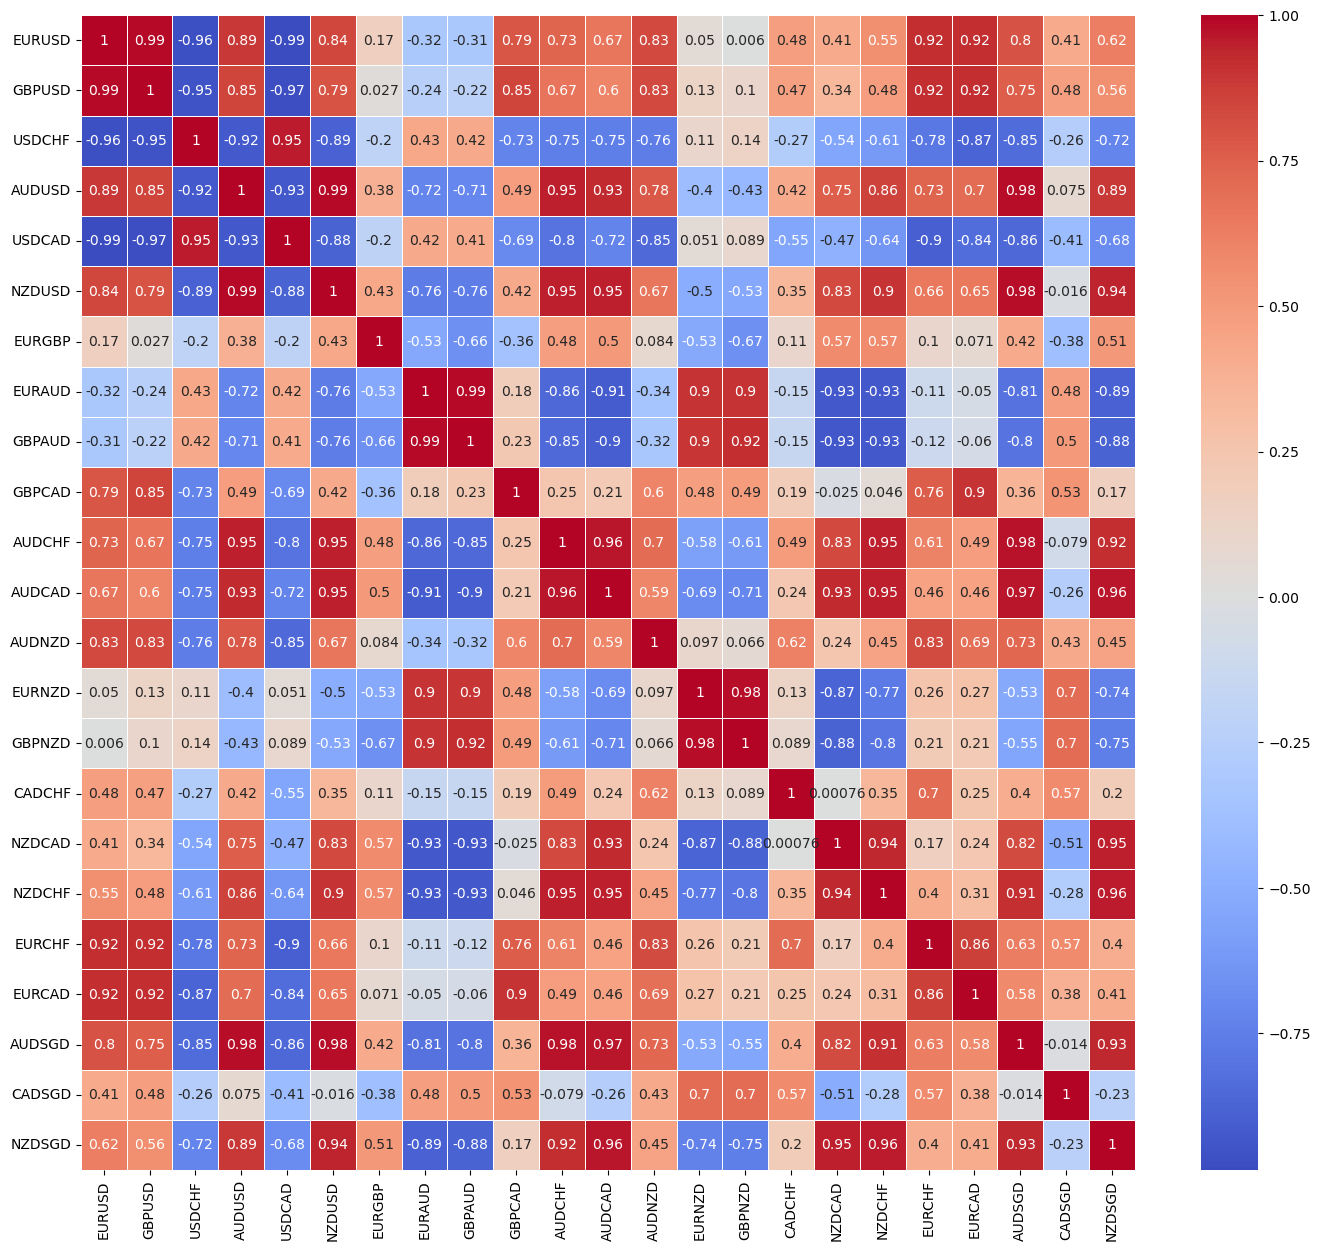

MetaTrader5 package version: 5.0.45
MetaTrader5 author: MetaQuotes Ltd.


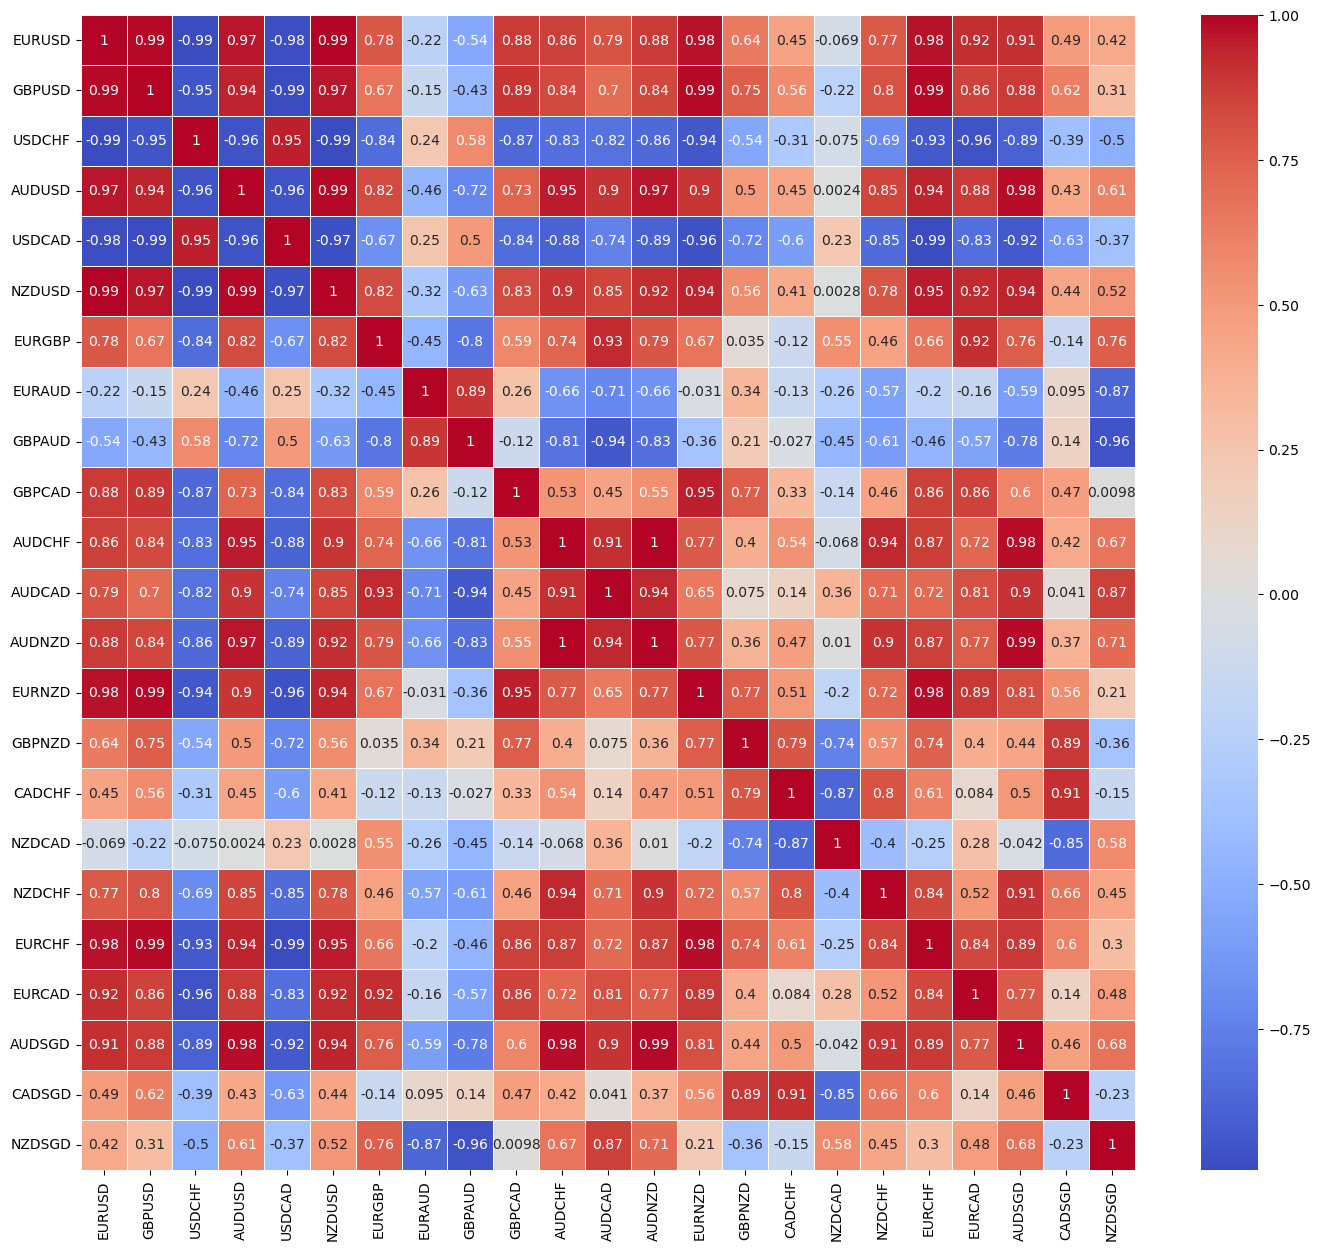

MetaTrader5 package version: 5.0.45
MetaTrader5 author: MetaQuotes Ltd.

Data for df_30_EURUSD:
        time     open     high      low    close  tick_volume  spread  \
0 2023-11-20  1.09065  1.09520  1.08976  1.09400        84238       0   
1 2023-11-21  1.09359  1.09652  1.09001  1.09105        87371       0   
2 2023-11-22  1.09066  1.09229  1.08524  1.08884        87795       0   
3 2023-11-23  1.08834  1.09305  1.08814  1.09038        58851       0   
4 2023-11-24  1.09020  1.09486  1.08950  1.09329        74514       0   
5 2023-11-27  1.09416  1.09592  1.09251  1.09536        92161       0   
6 2023-11-28  1.09530  1.10090  1.09344  1.09947       106518       0   
7 2023-11-29  1.09897  1.10172  1.09601  1.09688       117254       0   
8 2023-11-30  1.09682  1.09840  1.08794  1.08882       122343       0   
9 2023-12-01  1.08835  1.09129  1.08288  1.08811       123600       0   

   real_volume  
0            0  
1            0  
2            0  
3            0  
4            0 

        time    open    high     low   close  tick_volume  spread  real_volume
0 2023-11-20  97.223  97.729  97.020  97.294       119009       0            0
1 2023-11-21  97.155  97.422  96.831  97.283       103604       0            0
2 2023-11-22  97.279  97.928  97.080  97.847        94048       0            0
3 2023-11-23  97.719  98.193  97.662  98.080        70334       0            0
4 2023-11-24  97.921  98.540  97.895  98.333        79688       0            0
5 2023-11-27  98.242  98.494  97.815  98.229       105914       0            0
6 2023-11-28  98.136  98.378  97.881  98.050       122865       0            0
7 2023-11-29  98.037  98.045  97.338  97.425       134185       0            0
8 2023-11-30  97.262  98.100  97.238  97.893       137171       0            0
9 2023-12-01  97.829  98.069  97.694  98.005       135573       0            0

Data for df_30_CADJPY:
        time     open     high      low    close  tick_volume  spread  \
0 2023-11-20  108.925  109.305  10

        time     open     high      low    close  tick_volume  spread  \
0 2023-11-20  0.87281  0.87958  0.87193  0.87708        39994      22   
1 2023-11-21  0.87678  0.87973  0.87558  0.87733        85256      29   
2 2023-11-22  0.87678  0.88013  0.87483  0.87773        80272      24   
3 2023-11-23  0.87708  0.88032  0.87613  0.87838        53868      28   
4 2023-11-24  0.87798  0.88264  0.87702  0.88170        62895      30   
5 2023-11-27  0.88011  0.88392  0.87903  0.88298        84449      27   
6 2023-11-28  0.88263  0.88697  0.88167  0.88488        99334      19   
7 2023-11-29  0.88473  0.88681  0.88058  0.88193       112158      22   
8 2023-11-30  0.88063  0.88561  0.87935  0.88308       115997      16   
9 2023-12-01  0.88308  0.89017  0.88247  0.88979       116094      23   

   real_volume  
0            0  
1            0  
2            0  
3            0  
4            0  
5            0  
6            0  
7            0  
8            0  
9            0  

Data for

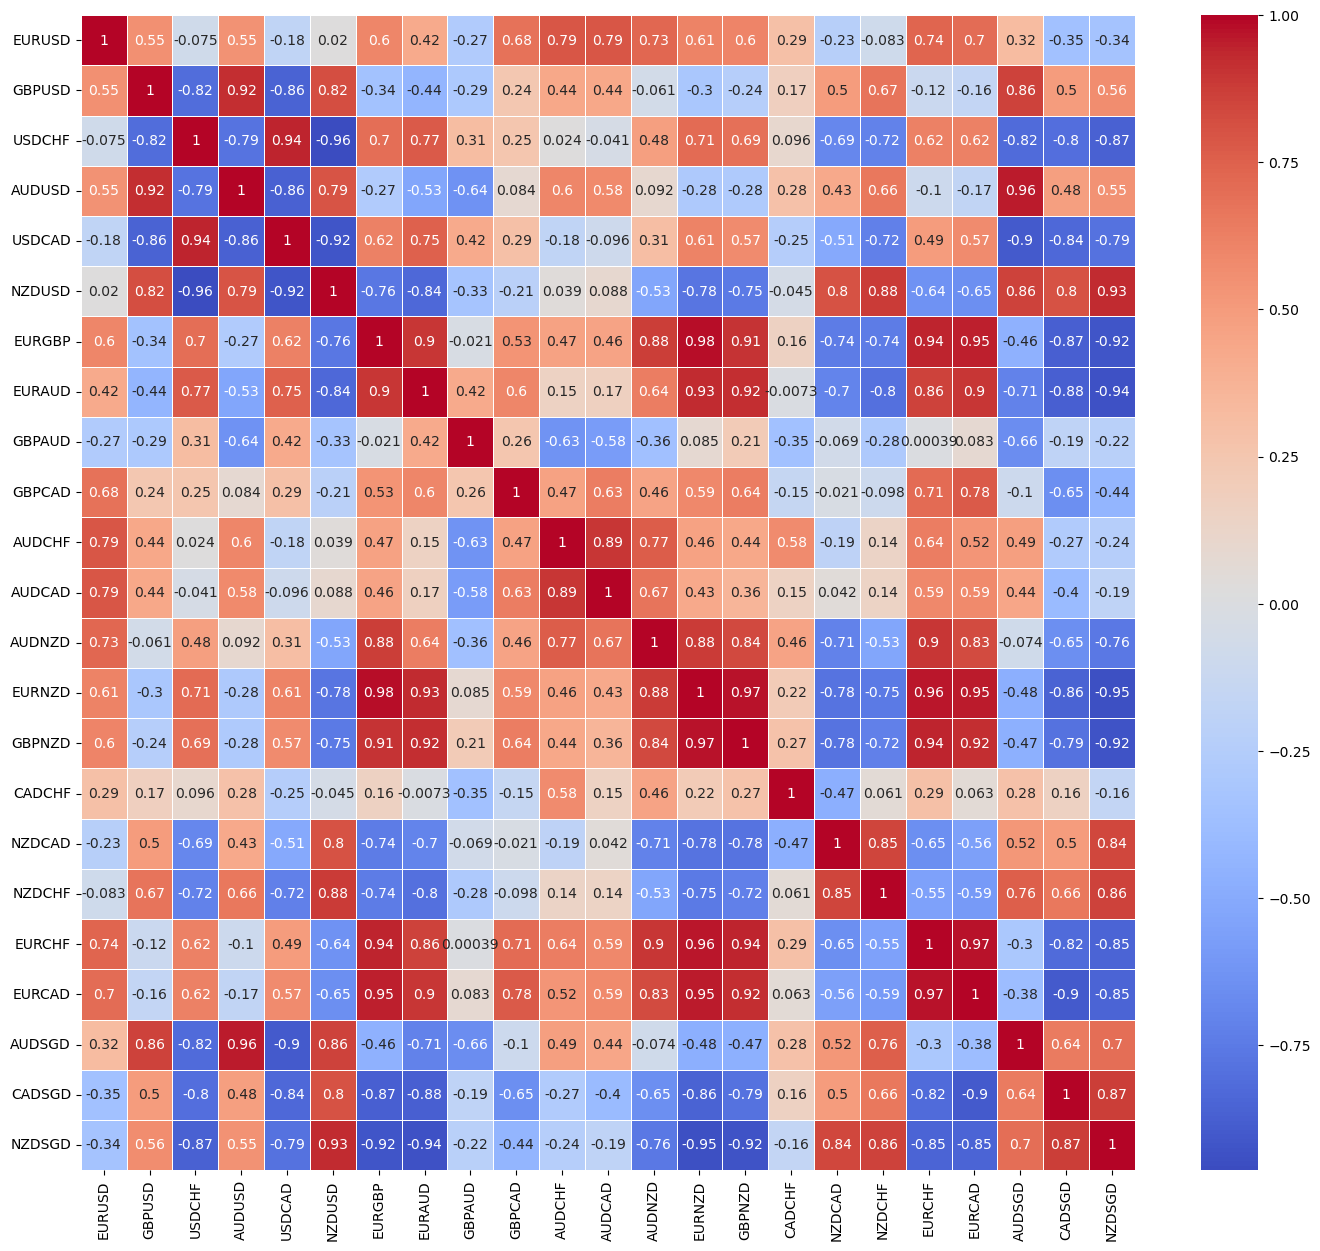

In [3]:
from datetime import datetime
import datetime as dt
import pytz
import seaborn as sns
import matplotlib.pyplot as plt
import MetaTrader5 as mt5
import pandas as pd
import pytz
import numpy as np
from plotly import graph_objects as go
import os
# Display MetaTrader5 package information

print(f"MetaTrader5 package version: {mt5.__version__}")
print(f"MetaTrader5 author: {mt5.__author__}")

lst_ = ['EURUSD', 'USDJPY', 'GBPUSD', 'USDCHF', 'AUDUSD', 'USDCAD', 'NZDUSD','EURGBP', 'EURAUD', 'EURJPY', 'GBPJPY', 'AUDJPY', 'CADJPY', 'CHFJPY',
        'NZDJPY', 'GBPAUD', 'GBPCAD', 'AUDCHF', 'AUDCAD', 'AUDNZD', 'EURNZD','GBPNZD', 'CADCHF', 'NZDCAD', 'NZDCHF', 'EURCHF', 'EURCAD', 'AUDSGD', 'CADSGD', 'CHFJPY', 'NZDSGD']

dict_ = {}

for i in lst_:
    # Initialize connection to the MetaTrader 5 terminal
    if not mt5.initialize():
        print("initialize() failed, error code =", mt5.last_error())
        quit()

    

 # Get historical price data for USD/JPY on a 30-minute timeframe
    symbol = i# Set the time zone to UTC
    timezone = pytz.timezone("Etc/UTC")

    # Define the date and time range for historical data
    hours_offset = dt.timedelta(hours=24*2)
    local_time = datetime.today()
    utc_from = local_time.astimezone(timezone)-hours_offset
    utc_to = local_time 
    timeframe = mt5.TIMEFRAME_M5
    rates = mt5.copy_rates_range(symbol, timeframe, utc_from, utc_to)
     # Check if data retrieval was successful
    if rates is not None and len(rates) > 0:
        # Create a DataFrame from the obtained data
        df = pd.DataFrame(rates)

        # Convert time in seconds to 'datetime' format
        df['time'] = pd.to_datetime(df['time'], unit='s')

        # Store the DataFrame in the dictionary
        dict_[f'df_30_{symbol}'] = df
    else:
        print(f"Failed to retrieve data for {symbol}")

    # Shut down the connection to the MetaTrader 5 terminal
    mt5.shutdown()
df_close = pd.concat([dict_[i]['close'] for i in dict_.keys() if 'JPY' not in i], axis='columns')
df_close.columns = [i for i in lst_ if 'JPY' not in i]
corr_close = df_close.corr()
corr_close.to_excel('C:\\Users\\morara\\correlation\\Corr_Daily.xlsx') #save correlation spreadsheet
 #Generate list of Positively correlated currency pairs
dict2_={}
for i in corr_close.columns:
    dict2_[i]=corr_close[i][corr_close[i]>0.75].dropna()

with open('C:/Users/morara/correlation/High_Dailycorr.txt', 'w') as f:
    for i in dict2_.keys():
        f.write(str(dict2_[i])+'\n')
 #Generate list of Negatively correlated currency pairs
dict2_={}
for i in corr_close.columns:
    dict2_[i]=corr_close[i][corr_close[i]<0.3].dropna()

with open('C:/Users/morara/correlation/Negative_Dailycorr.txt', 'w') as f:
    for i in dict2_.keys():
        f.write(str(dict2_[i])+'\n')
 #plot seaborn correlation heatmap and savefig as jpg
fig, ax = plt.subplots(figsize=(17,15))
hm = sns.heatmap(corr_close, annot=True,cmap='coolwarm', linewidths=0.5, ax=ax)
folder_path = 'C:\\Users\\morara\\correlation\\'
file_name = 'my_Corr-Daily.jpg'  # Change the file format to your preference (.png, .jpg, .pdf, etc.)
plt.savefig(os.path.join(folder_path, file_name))  # Use os.path.join to combine folder_path and file_name
plt.show();       
 #Weekly correlation data 
 # Display MetaTrader5 package information

print(f"MetaTrader5 package version: {mt5.__version__}")
print(f"MetaTrader5 author: {mt5.__author__}")

lst_ = ['EURUSD', 'USDJPY', 'GBPUSD', 'USDCHF', 'AUDUSD', 'USDCAD', 'NZDUSD','EURGBP', 'EURAUD', 'EURJPY', 'GBPJPY', 'AUDJPY', 'CADJPY', 'CHFJPY',
        'NZDJPY', 'GBPAUD', 'GBPCAD', 'AUDCHF', 'AUDCAD', 'AUDNZD', 'EURNZD','GBPNZD', 'CADCHF', 'NZDCAD', 'NZDCHF', 'EURCHF', 'EURCAD', 'AUDSGD', 'CADSGD', 'CHFJPY', 'NZDSGD']

dict_ = {}

for i in lst_:
    # Initialize connection to the MetaTrader 5 terminal
    if not mt5.initialize():
        print("initialize() failed, error code =", mt5.last_error())
        quit()

    # Set the time zone to UTC
    timezone = pytz.timezone("Etc/UTC")    
    

    # Define the date and time range for historical data (weekly version)
    days_offset = dt.timedelta(weeks=1)  # Changed to represent one week
    local_time = dt.datetime.today()

    # Calculate the start and end dates for the weekly range
    utc_from = local_time - days_offset
    utc_to = local_time


     # Get historical price data for USD/JPY on a 30-minute timeframe
    symbol = i
    timeframe = mt5.TIMEFRAME_D1
    rates = mt5.copy_rates_range(symbol, timeframe, utc_from, utc_to)
 # Check if data retrieval was successful
    if rates is not None and len(rates) > 0:
        # Create a DataFrame from the obtained data
        df = pd.DataFrame(rates)

        # Convert time in seconds to 'datetime' format
        df['time'] = pd.to_datetime(df['time'], unit='s')

        # Store the DataFrame in the dictionary
        dict_[f'df_30_{symbol}'] = df
    else:
        print(f"Failed to retrieve data for {symbol}")

    # Shut down the connection to the MetaTrader 5 terminal
    mt5.shutdown()
        

          
df_close = pd.concat([dict_[i]['close'] for i in dict_.keys() if 'JPY' not in i], axis='columns')
df_close.columns = [i for i in lst_ if 'JPY' not in i]
corr_close = df_close.corr() 
corr_close.to_excel('C:\\Users\\morara\\correlation\\Corr_weekly.xlsx')
 #Generate list of Positively correlated currency pairs
dict2_={}
for i in corr_close.columns:
    dict2_[i]=corr_close[i][corr_close[i]>0.75].dropna()

with open('C:/Users/morara/correlation/High_weeklycorr.txt', 'w') as f:
    for i in dict2_.keys():
        f.write(str(dict2_[i])+'\n')
 #Generate list of Negatively correlated currency pairs
dict2_={}
for i in corr_close.columns:
    dict2_[i]=corr_close[i][corr_close[i]<0.3].dropna()

with open('C:/Users/morara/correlation/Negative_weeklycorr.txt', 'w') as f:
    for i in dict2_.keys():
        f.write(str(dict2_[i])+'\n')
  #plot seaborn correlation heatmap and savefig as jpg
fig, ax = plt.subplots(figsize=(17,15))
hm = sns.heatmap(corr_close, annot=True,cmap='coolwarm', linewidths=0.5, ax=ax)
folder_path = 'C:\\Users\\morara\\correlation\\'
file_name = 'my_Corr-Daily.jpg'  # Change the file format to your preference (.png, .jpg, .pdf, etc.)
plt.savefig(os.path.join(folder_path, file_name))  # Use os.path.join to combine folder_path and file_name
plt.show();
    #Fetching Monthly currency pairs data mt5
#Display MetaTrader5 package information
print(f"MetaTrader5 package version: {mt5.__version__}")
print(f"MetaTrader5 author: {mt5.__author__}")

# Initialize connection to the MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =", mt5.last_error())
    quit()

# Set the time zone to UTC
timezone = pytz.timezone("Etc/UTC")
lst_ = ['EURUSD', 'USDJPY', 'GBPUSD', 'USDCHF', 'AUDUSD', 'USDCAD', 'NZDUSD','EURGBP', 'EURAUD', 'EURJPY', 'GBPJPY', 'AUDJPY', 'CADJPY', 'CHFJPY',
        'NZDJPY', 'GBPAUD', 'GBPCAD', 'AUDCHF', 'AUDCAD', 'AUDNZD', 'EURNZD','GBPNZD', 'CADCHF', 'NZDCAD', 'NZDCHF', 'EURCHF', 'EURCAD', 'AUDSGD', 'CADSGD', 'CHFJPY', 'NZDSGD']

dict_ = {}

for symbol in lst_:
    # Define the date and time range for historical data (weekly version)
    days_offset = dt.timedelta(weeks=4)
    local_time = dt.datetime.today()

    # Calculate the start and end dates for the weekly range in UTC
    utc_from = local_time - days_offset
    utc_to = local_time

    # Get historical price data for the symbol on a daily timeframe
    timeframe = mt5.TIMEFRAME_D1
    rates = mt5.copy_rates_range(symbol, timeframe, utc_from, utc_to)

    # Check if data retrieval was successful
    if rates is not None and len(rates) > 0:
        # Create a DataFrame from the obtained data
        df = pd.DataFrame(rates)

        # Convert time in seconds to 'datetime' format
        df['time'] = pd.to_datetime(df['time'], unit='s')

        # Store the DataFrame in the dictionary
        dict_[f'df_30_{symbol}'] = df
    else:
        print(f"Failed to retrieve data for {symbol}")

# Shut down the connection to the MetaTrader 5 terminal
mt5.shutdown()

# Display the first 10 elements of the obtained data for each currency pair
for key, df in dict_.items():
    print(f"\nData for {key}:")
    print(df.head(10))
df_close = pd.concat([dict_[i]['close'] for i in dict_.keys() if 'JPY' not in i], axis='columns')
df_close.columns = [i for i in lst_ if 'JPY' not in i]
corr_close = df_close.corr() 
corr_close.to_excel('C:\\Users\\morara\\correlation\\Corr_Monthly.xlsx')
 #Generate list of Positively correlated currency pairs
dict2_={}
for i in corr_close.columns:
    dict2_[i]=corr_close[i][corr_close[i]>0.75].dropna()

with open('C:/Users/morara/correlation/High_Monthlycorr.txt', 'w') as f:
    for i in dict2_.keys():
        f.write(str(dict2_[i])+'\n') 
 #Generate list of Negatively correlated currency pairs
dict2_={}
for i in corr_close.columns:
    dict2_[i]=corr_close[i][corr_close[i]<0.3].dropna()

with open('C:/Users/morara/correlation/Negative_Monthlycorr.txt', 'w') as f:
    for i in dict2_.keys():
        f.write(str(dict2_[i])+'\n')
  #plot seaborn correlation heatmap and savefig as jpg
fig, ax = plt.subplots(figsize=(17,15))
hm = sns.heatmap(corr_close, annot=True,cmap='coolwarm', linewidths=0.5, ax=ax)
folder_path = 'C:\\Users\\morara\\correlation\\'
file_name = 'my_Corr-monthly.jpg'  # Change the file format to your preference (.png, .jpg, .pdf, etc.)
plt.savefig(os.path.join(folder_path, file_name))  # Use os.path.join to combine folder_path and file_name
plt.show();
